In [1]:
import numpy as np
import pandas as pd

In [2]:
books = pd.read_csv("books.csv")

In [3]:
books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
books.shape

(550, 7)

О скількох книгах дані в датасеті? В датасеті 550 книг

In [5]:
books.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [6]:
books.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Чи є десь пропуски ? Пропусків немає

In [7]:
books.genre.unique()

array(['Non Fiction', 'Fiction'], dtype=object)

Які є унікальні жанри? Художня і не художня література

<AxesSubplot:ylabel='Frequency'>

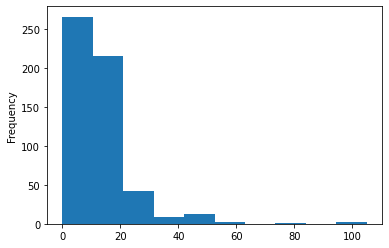

In [8]:
books["price"].plot(kind="hist")

In [9]:
f"min = {books.price.min()}, max = {books.price.max()}, avg = {books.price.mean()}, median = {books.price.median()}"

'min = 0, max = 105, avg = 13.1, median = 11.0'

Мінімальна ціна? Безкоштовно

Максимальна ціна? 105

Середня ціна? 13.1

Медіанна ціна? 11


In [10]:
books.user_rating.max()

4.9

Максимальний рейтинг? 4.9

In [11]:
books[books.user_rating == books.user_rating.max()].shape[0]

52

Скільки книг мають максимальний рейтинг ? 52

In [12]:
books[books.reviews == books.reviews.max()]["name"]

534    Where the Crawdads Sing
Name: name, dtype: object

У якої книги найбільше всього відгуків ? Назва книги : "Where the Crawdads Sing"

In [13]:
in_2015 = books[books.year == 2015]
in_2015[in_2015.price == in_2015.price.max()]["name"]

277    Publication Manual of the American Psychologic...
Name: name, dtype: object

Найбільш дорога книга 2015 року ? Назва книги : "Publication Manual of the American Psychological Association, 6th Edition"

In [14]:
books[(books.year == 2010) & (books.genre == "Fiction")].shape[0]

20

Скільки книг 2010 року художні ? 20

In [15]:
books[(books.year.isin((2010, 2011))) & (books.user_rating == 4.9)].shape[0]

1

Скільки книг у 2010 і 2011 році з рейтингом 4.9 ? Одна

In [16]:
books[(books.year == 2015) & (books.price < 8)].sort_values('price')

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


In [17]:
books[(books.year == 2015) & (books.price < 8)].sort_values('price')["name"].iloc[-1]

'Old School (Diary of a Wimpy Kid #10)'

Остання книга у відсортованному списку ? Назва книги : "Old School (Diary of a Wimpy Kid #10)"

In [25]:
book_genres = books[["name", "genre", "price"]].groupby("genre")
book_genres["price"].agg(["min", "max"])

,min,max
genre,,
Fiction,0,82
Non Fiction,0,105


Максимальна ціна для художньої літератури ? 82

Мінімальна ціна для художньої літератури ? 0

Максимальна ціна для не художньої літератури ? 105 

Мінімальна ціна для не художньої літератури ? 0

In [42]:
book_authors = books[["author", "name"]].groupby("author").agg("count")
book_authors

,name
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
...,...
Walter Isaacson,3
William Davis,2
William P. Young,2


Скільки авторів всього ? 248

In [44]:
book_authors[book_authors.name == book_authors.name.max()]

,name
author,
Jeff Kinney,12


У якого автора більше всього написанних книг ? Jeff Kinney

Скільки у нього написано книг ? 12

In [47]:
rating_authors = books[["author", "user_rating"]].groupby("author").agg("mean")
rating_authors

,user_rating
author,
Abraham Verghese,4.600000
Adam Gasiewski,4.400000
Adam Mansbach,4.800000
Adir Levy,4.800000
Admiral William H. McRaven,4.700000
...,...
Walter Isaacson,4.566667
William Davis,4.400000
William P. Young,4.600000


In [50]:
rating_authors[rating_authors.user_rating == rating_authors.user_rating.min()]

,user_rating
author,
Donna Tartt,3.9


У якого автора мінімальний середній рейтинг ? Donna Tartt

Який у цього автора рейтинг ? 3.9

In [55]:
authors = pd.concat([book_authors, rating_authors], axis=1)
authors.columns = ["books", "rating"]
authors

,books,rating
author,,
Abraham Verghese,2,4.600000
Adam Gasiewski,1,4.400000
Adam Mansbach,1,4.800000
Adir Levy,1,4.800000
Admiral William H. McRaven,1,4.700000
...,...,...
Walter Isaacson,3,4.566667
William Davis,2,4.400000
William P. Young,2,4.600000


In [58]:
authors.sort_values(["books", "rating"])

,books,rating
author,,
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Elizabeth Strout,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


Який автор перший у новому списку ? Muriel Barbery